Epoch 0: Cost = 4597.4453
Epoch 500: Cost = 78.4356
Epoch 1000: Cost = 78.4162
Epoch 1500: Cost = 78.3971
Epoch 2000: Cost = 78.3781
Epoch 2500: Cost = 78.3592
Epoch 3000: Cost = 78.3406
Epoch 3500: Cost = 78.3221
Epoch 4000: Cost = 78.3036
Epoch 4500: Cost = 78.2854

Learned manual model: y = 0.9465x + 0.3195
Sklearn model: y = 0.8491x + 7.3576
Sklearn model MSE: 76.1565


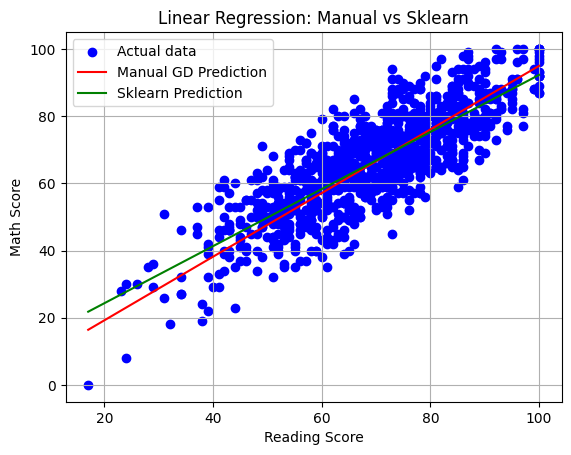

In [11]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load CSV file
df = pd.read_csv('StudentsPerformance.csv')

x = df['reading score'].values.astype(np.float32)
y = df['math score'].values.astype(np.float32)


#MANUAL MODEL

m = 0
b = 0
alpha = 0.0001
epochs = 5000
n = len(x)

for epoch in range(epochs):
    y_pred = m * x + b
    error = y - y_pred

    #Computing gradients
    dm = (-2/n) * sum(error * x)
    db = (-2/n) * sum(error)

    #Update parameters
    m = m - alpha * dm
    b = b - alpha * db

    # Compute cost (MSE)
    cost = (1/n) * sum(error ** 2)

    if epoch % 500 == 0:  # print every 500 steps
        print(f"Epoch {epoch}: Cost = {cost:.4f}")

print(f"\nLearned manual model: y = {m:.4f}x + {b:.4f}")

y_pred_manual = m * x + b



# SKLEARN MODEL

# sklearn needs a 2D array for features
X = x.reshape(-1,1)  

model = LinearRegression()
model.fit(X, y)

m_sklearn = model.coef_[0]
b_sklearn = model.intercept_

print(f"Sklearn model: y = {m_sklearn:.4f}x + {b_sklearn:.4f}")

y_pred_sklearn = model.predict(X)

# Calculate MSE
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print(f"Sklearn model MSE: {mse_sklearn:.4f}")

# Plot both manual and sklearn predictions
sorted_idx = np.argsort(x)

plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x[sorted_idx], y_pred_manual[sorted_idx], color='red', label='Manual GD Prediction')
plt.plot(x[sorted_idx], y_pred_sklearn[sorted_idx], color='green', label='Sklearn Prediction')

plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.title('Linear Regression: Manual vs Sklearn')
plt.legend()
plt.grid(True)
plt.show()
